In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
from sklearn.ensemble import RandomForestClassifier

In [8]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
import json

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
from google.colab import files
uploaded = files.upload()

Saving updated_X_recommend.pkl to updated_X_recommend.pkl
Saving updated_X_test.pkl to updated_X_test.pkl
Saving updated_X_train.pkl to updated_X_train.pkl
Saving updated_y_test.pkl to updated_y_test.pkl
Saving updated_y_train.pkl to updated_y_train.pkl


## Load the data

In [11]:
# Load the data
X_train = pd.read_pickle('updated_X_train.pkl')
y_train = pd.read_pickle('updated_y_train.pkl')
X_test = pd.read_pickle('updated_X_test.pkl')
y_test = pd.read_pickle('updated_y_test.pkl')
X_recommend = pd.read_pickle('updated_X_recommend.pkl')

In [12]:
X_train.head()

,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,...,genre_modern indie pop,genre_modern rock,genre_nashville indie,genre_new romantic,genre_nz folk,genre_permanent wave,genre_pop,genre_pop punk,genre_pop rock,genre_shimmer pop
5430,175093.0,0.143,0.2690,10.0,-17.614,1.0,0.0351,0.290,0.859000,0.152,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1349,141062.0,0.106,0.0202,8.0,-32.719,1.0,0.0430,0.799,0.769000,0.109,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1754,210253.0,0.417,0.6890,2.0,-8.302,0.0,0.1780,0.575,0.000000,0.496,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7103,333329.0,0.499,0.5830,9.0,-6.628,0.0,0.2100,0.227,0.000000,0.103,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4726,168854.0,0.828,0.3330,4.0,-10.351,0.0,0.0332,0.732,0.000526,0.117,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Since Random Forest is a Tree-based algorithm, it is fairly insensitive to the scale of the features, thus we wont scale the features for this model.

### Hyperparameter Tuning

We will tune for:
- The number of trees in the forest (n_estimators)
- The maximum depth of the tree (max_depth)
- The minimum number of samples required to split an internal node (min_samples_split)
- The minimum number of samples required to be at a leaf node (min_samples_leaf)
- Whether bootstrap samples are used when building trees. If False, the whole dataset is used to build each tree (bootstrap)

In [13]:
# Check accuracy for each value for each hyperparameter in its range
# We will use GridSearchCV to automate this process

n_estimators = [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]
max_depth = [40, 50, 60, 70,]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

#Convert to dictionary
hyperparameters = dict(n_estimators=n_estimators,
                      max_depth=max_depth,
                      min_samples_split=min_samples_split,
                      min_samples_leaf=min_samples_leaf,
                      bootstrap=bootstrap)

print(hyperparameters)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_depth': [40, 50, 60, 70], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [14]:
# estimator = ML model to be tested
# param_grid = dictionary of hyperparameters to be tested
# n_jobs = number of cores to be used in parallel, -1 means use all
# cv = number of cross validation set elements
# verbose = setting it to 2 will print updates to the terminal

best_model = GridSearchCV(estimator=RandomForestClassifier(),
                         param_grid=hyperparameters,
                         n_jobs=-1,
                         cv=10,
                         verbose=2)

# Fit the model
best_model = best_model.fit(X_train,y_train)

Fitting 10 folds for each of 720 candidates, totalling 7200 fits


KeyboardInterrupt: 

In [15]:
n_estimators = 1600
max_depth = 50
min_samples_split = 2
min_samples_leaf = 1
bootstrap = False

In [ ]:
n_estimators = best_model.best_estimator_.get_params()['n_estimators']
max_depth = best_model.best_estimator_.get_params()['max_depth']
min_samples_split = best_model.best_estimator_.get_params()['min_samples_split']
min_samples_leaf = best_model.best_estimator_.get_params()['min_samples_leaf']
bootstrap = best_model.best_estimator_.get_params()['bootstrap']

print(f'Best n_estimators: {n_estimators}')
print(f'Best max_depth: {max_depth}')
print(f'Best min_samples_split: {min_samples_split}')
print(f'Best min_samples_leaf: {min_samples_leaf}')
print(f'Best bootstrap: {bootstrap}')

NameError: name 'best_model' is not defined

# Model

In [16]:
# model
random_forest = RandomForestClassifier(n_estimators=n_estimators,
                                       max_depth=max_depth,
                                       min_samples_split=min_samples_split,
                                       min_samples_leaf=min_samples_leaf,
                                       bootstrap=bootstrap)

# fit the model
random_forest.fit(X_train, y_train)

# prediction
predictions = random_forest.predict(X_test)

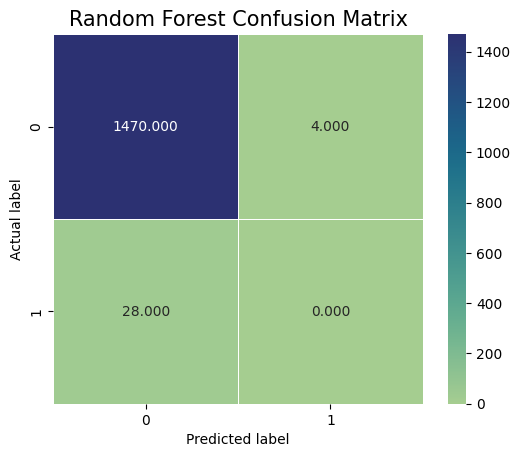

In [17]:
cm = confusion_matrix(y_test, predictions)
plt.figure()
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'crest');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title('Random Forest Confusion Matrix', size = 15);
plt.show()

In [18]:
precision_macro_average = precision_score(y_test, predictions, average='macro')
precision_weighted_average = precision_score(y_test, predictions, average='weighted')

recall_macro_average = recall_score(y_test, predictions, average='macro')
recall_weighted_average = recall_score(y_test, predictions, average='weighted')

f1_macro_average = f1_score(y_test, predictions, average='macro')
f1_weighted_average = f1_score(y_test, predictions, average='weighted')


print(f'Precision (macro average)--> {round(precision_macro_average*100, 2)}%')
print(f'Precision (weighted average)--> {round(precision_weighted_average*100, 2)}%')

print(f'Recall (macro average)--> {round(recall_macro_average*100, 2)}%')
print(f'Recall (weighted average)--> {round(recall_weighted_average*100, 2)}%')

print(f'F1 score (macro average)--> {round(f1_macro_average*100, 2)}%')
print(f'F1 score (weighted average)--> {round(f1_weighted_average*100, 2)}%')

Precision (macro average)--> 49.07%
Precision (weighted average)--> 96.3%
Recall (macro average)--> 49.86%
Recall (weighted average)--> 97.87%
F1 score (macro average)--> 49.46%
F1 score (weighted average)--> 97.08%


In [19]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1474
           1       0.00      0.00      0.00        28

    accuracy                           0.98      1502
   macro avg       0.49      0.50      0.49      1502
weighted avg       0.96      0.98      0.97      1502



In [20]:
# File path on Google Drive
file_path = "/content/drive/MyDrive/year 29/Data Science /notebooks/spotify/model/f1_scores.json"


In [21]:
# Serialize f1 scores into a json file for later comparison between all models
model_name = "updated_random_forest"
entry = {"f1_macro_average":f1_macro_average, "f1_weighted_average":f1_weighted_average}


with open(file_path, "r") as file:
    data = json.load(file)
data[model_name] = entry
with open(file_path, "w") as file:
    json.dump(data, file, indent=4)